<a href="https://colab.research.google.com/github/pranav1001/SCAAI_proj/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [6]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [7]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))



Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173.0


In [8]:
print("Label:", targets[0])

Label: 1
print(data[0])
print(np.shape(data[0]))

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(218,)


In [9]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:

def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [11]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
np.shape(train_x)

(40000, 10000)

In [12]:
model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
________________________________________________

In [13]:
from time import time
from keras.callbacks import TensorBoard
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [14]:
results = model.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y),
 callbacks=[tensorboard] )


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 4s 98us/step - loss: 0.4272 - accuracy: 0.7990 - val_loss: 0.2642 - val_accuracy: 0.8970
Epoch 2/10
40000/40000 [==============================] - 4s 88us/step - loss: 0.2182 - accuracy: 0.9172 - val_loss: 0.2653 - val_accuracy: 0.8953
Epoch 3/10
40000/40000 [==============================] - 3s 87us/step - loss: 0.1587 - accuracy: 0.9414 - val_loss: 0.2914 - val_accuracy: 0.8894
Epoch 4/10
40000/40000 [==============================] - 3s 87us/step - loss: 0.1136 - accuracy: 0.9600 - val_loss: 0.3393 - val_accuracy: 0.8894
Epoch 5/10
40000/40000 [==============================] - 4s 88us/step - loss: 0.0800 - accuracy: 0.9726 - val_loss: 0.3857 - val_accuracy: 0.8865
Epoch 6/10
40000/40000 [==============================] - 4s 88us/step - loss: 0.0563 - accuracy: 0.9818 - val_loss: 0.4474 - val_accuracy: 0.8861
Epoch 7/10
40000/40000 [==============================] - 3s 87us/st

In [16]:
print(np.mean(results.history["val_accuracy"]))

0.8872500002384186


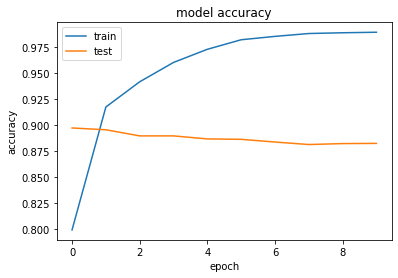

In [22]:
import matplotlib.pyplot as plt


plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

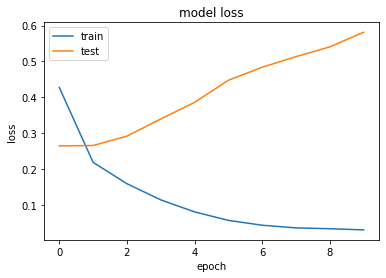

In [18]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# index = imdb.get_word_index()
# reverse_index = dict([(value, key) for (key, value) in index.items()]) 
# decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
# #print(decoded) 
# my_text1= "this film was just great casting location scenery story direction everyone's is very happy. good experience"

# my_text1= list(my_text1.split(" "))

# type(my_text1)

list

In [20]:
# def getKeysByValue(dictOfElements, valueToFind):
#     listOfKeys = list()
#     listOfItems = dictOfElements.items()
#     for x in valueToFind:
#       for item  in listOfItems:
#         if item[0] == x:
#             listOfKeys.append(item[1]+ 3)
#     return  listOfKeys

In [21]:
# listOfKeys = getKeysByValue(index, my_text1)
# istOfKeys = np.asarray(listOfKeys)
# np.shape(listOfKeys)

(15,)

In [ ]:
# def vectorize(sequences, dimension = 10000):
#   results = np.zeros((len(sequences), dimension))
#   for i, sequence in enumerate(sequences):
#     results[i, sequence] = 1
#   return results
 
# data = vectorize(data)

# data_predic=vectorize_p(istOfKeys)
# np.shape(data_predic)

In [ ]:
# pred= model.predict_on_batch(data_predic)
# print(pred)